<h1>Digit Recognizer using Tensorflow on MNIST Dataset</h1>

The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API. Therefore, I will start with the following two lines to import tensorflow and MNIST dataset under the Keras API.

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

<p>The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students [4]. Therefore, in the second line, I have separated these two groups as train and test and also separated the labels and the images. x_train and x_test parts contain greyscale RGB codes (from 0 to 255) while y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are. To visualize these numbers, we can get help from matplotlib.
</p>


In [0]:
(X_train, y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

When we run the code above, we will get the greyscale visualization of the RGB codes as shown below.



7


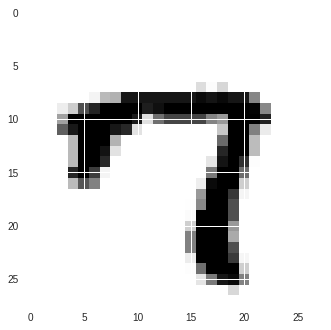

In [0]:
image_index = 6666 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 7
plt.imshow(X_train[image_index], cmap='Greys')

<h2>Reshaping and Normalizing the Images</h2>
To be able to use the dataset in Keras API, we need 4-dims numpy arrays. However, as we see above, our array is 3-dims. In addition, we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). This can be done with the following code:

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('Number of images in X_train: ',X_train.shape[0])
print('Number of images in X_test: ',X_test.shape[0])



Number of images in X_train:  60000
Number of images in X_test:  10000


<h2>Building the Convolutional Neural Network</h2>
We will build our model by using high level Keras API which uses either TensorFlow or Theano on the backend. I would like to mention that there are several high level TensorFlow APIs such as Layers, Keras, and Estimators which helps us create neural networks with high level knowledge. I will use the most straightforward API which is Keras. Therefore, I will import the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers. I have already talked about Conv2D, Maxpooling, and Dense layers. In addition, Dropout layers fight with the overfitting by disregarding some of the neurons while training while Flatten layers flatten 2D arrays to 1D array before building the fully connected layers.

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Flatten

model = Sequential()
model.add(Conv2D(28,kernel_size = (3,3),input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128,activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<h2>Compiling and Fitting the Model</h2>
With the above code, we created an non-optimized empty CNN. Now it is time to set an optimizer with a given loss function which uses a metric. Then, we can fit the model by using our train data. We will use the following code for these tasks:

In [0]:
model.compile(optimizer  = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train, y_train,epochs = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 50s 830us/step - loss: 0.2012 - acc: 0.9389
Epoch 2/10
60000/60000 [==============================] - 49s 812us/step - loss: 0.0802 - acc: 0.9754
Epoch 3/10
60000/60000 [==============================] - 48s 808us/step - loss: 0.0573 - acc: 0.9821
Epoch 4/10
60000/60000 [==============================] - 48s 808us/step - loss: 0.0421 - acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 49s 817us/step - loss: 0.0333 - acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 49s 812us/step - loss: 0.0286 - acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 48s 800us/step - loss: 0.0244 - acc: 0.9920
Epoch 8/10
60000/60000 [==============================] - 48s 799us/step - loss: 0.0207 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 48s 803us/step - loss: 0.0200 - acc: 0.9929
Epoch 10/10
60000/60000 [=========

You can experiment with the optimizer, loss function, metrics, and epochs. However, I can say that adam optimizer is usually out-performs the other optimizers. I am not sure if you can actually change the loss function for multi-class classification. Feel free to experiment and comment below. Epoch number might seem a bit small. However, you will reach to 98–99% test accuracy. Since the MNIST dataset does not require heavy computing power, you may easily experiment with the epoch number as well.

In [0]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 244us/step


[0.06606573488289796, 0.9833]

We achieved 98.5% accuracy with such basic model. To be frank, in many image classification cases (e.g. for autonomous cars), we cannot even tolerate 0.1% error since, as an analogy, it will cause 1 accident in 1000 cases. However, for our first model, I would say the result is still pretty good. We can also make individual predictions with the following code:

Predicted value :  9
Actual value :  9


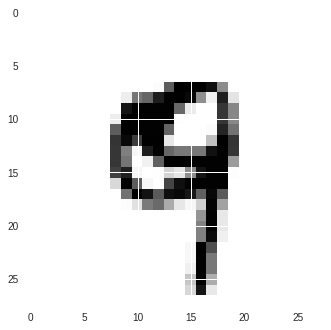

In [0]:
image_index = 4444
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28,28, 1))
print("Predicted value : ", pred.argmax())
print("Actual value : ", y_test[image_index])